# Chapter08 代表的な連続型確率分布

- Numpy
  - 確率変数を「とりうる値」と「密度関数」から定義していく数式レベルの実装
- SciPy.stats
  - 実際の統計解析を行ううえで、便利な機能に触れつつ、確率分布の特徴について考察する

In [23]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
from ipywidgets import interact

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [24]:
# 関数の作成
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    """1次元の連続型確率変数の期待値 E(X)"""
    x_range, f = X
    def integrand(x):
        """被積分関数"""
        return g(x) * f(x)

    return integrate.quad(
        integrand,
        -np.inf, np.inf
    )[0]

def V(X, g=lambda x: x):
    """1次元の連続型確率変数の分散 V(X)"""
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        """被積分関数"""
        return (g(x) - mean)**2 * f(x)

    return integrate.quad(
        integrand,
        -np.inf, np.inf
    )[0]

def check_prob(X):
    """
    確率変数を引数に、その確率変数が確率の性質を満たしているか確認数する
    期待値と分散を返す
    """
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, "密度関数が負の値をとります。"

    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f"確率の和が{prob_sum}になりました。"

    print(f"期待値: {E(X):.3f}")
    print(f"分散: {V(X):.3f}")

def plot_prob(X, x_min, x_max):
    """
    確率変数と区間を引数に、
    その確率変数の密度関数と分布関数を図示する
    """
    x_range, f = X
    def F(x):
        """密度関数"""
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color='gray')
    ax.legend()
    plt.show()

## 8.1 正規分布

- 正規分布（normal distribution）
  - ガウス分布（Gaussian distribution）
  - とりうる値は、実数全体
  - $N(\mu, \sigma^2)$
  - パラメータ
    - $\mu$（実数）
    - $\sigma^2$（$\sigma$は正の実数）

#### 正規分布の密度関数

$N(\mu, \sigma^2)$の密度関数

$$
f(x) = \dfrac{1}{\sqrt{2\pi}\sigma}exp\left\{ -\dfrac{(x - \mu)^2}{2\sigma^2} \right\}
~~~ (-\infty < x < \infty)
$$

#### 正規分布の期待値と分散

$X \sim N(\mu, \sigma^2)$とするとき

$$
\begin{align*}
E(X) &= \mu
\\
V(X) &= \sigma^2
\end{align*}
$$

#### 正規分布の変換

$N \sim N(\mu, \sigma^2)$とするとき、任意の実数$a, b$に対して

$$
aX + b \sim N(a\mu + b, ~ a^2\sigma^2)
$$

が成り立つ。

これを利用することで、

$X \sim N(\mu, \sigma^2)$を標準化した確率変数$Z = (X - \mu)/\sigma$は、$N(0, 1)$に従うことがわかる。

- **標準正規分布（standard normal distribution）**
  - 標準化した正規分布$N(0, 1)$

In [25]:
# NumPy
# 正規分布の密度関数
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
            np.exp(-(x-mu)**2 / (2 * sigma**2))
    
    return x_range, f

In [26]:
# N(2, 0.5^2)に従う確率変数X
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [27]:
# N(2, 0.5^2)に従う確率変数Xの
# 期待値と分散
check_prob(X)

期待値: 2.000
分散: 0.250


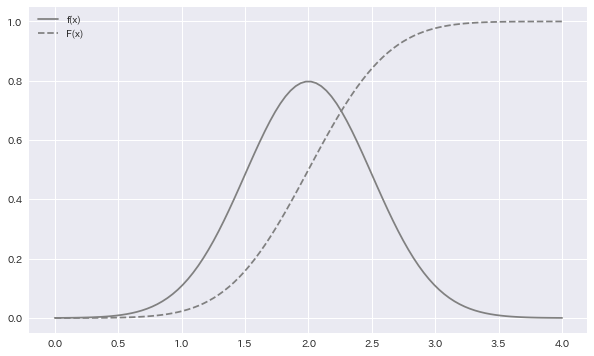

In [28]:
# N(2, 0.5^2)に従う確率変数Xの
# 密度関数と分布関数の図示
# 区間: [0, 4]
plot_prob(X, 0, 4)

In [29]:
# scipy.statsを使った実装
# 正規分布に従う確率変数
# stats.norm(μ, σ)
rv = stats.norm(2, 0.5)

In [30]:
# 期待値と分散
rv.mean(), rv.var()

(2.000, 0.250)

In [31]:
# 密度関数
rv.pdf(2)

0.798

In [32]:
# 分布関数
# 確率P(X <= x)
rv.cdf(1.7)

0.274

- **上側100α%点（upper 100α% point）**
  - $P(X \geq x) = \alpha$を満たすような$x$
  - 領域の面積が$\alpha$となるような左側の$x$座標に相当
- $z_\alpha$
  - $Z \sim N(0, 1)$とすると、$P(Z \geq z_\alpha) = \alpha$を満たす
- 標準正規分布は、$x=0$を中心に対称な形をしているので、$z_{1-\alpha} = -z_\alpha$が成り立つ

In [33]:
# 上側30%点を求める
rv.isf(0.3)

2.262

- **$100_\alpha\%$区間**
  - 確率が$\alpha$となる中央の区間
  - 領域の面積が$\alpha$となるような、$a, b$を求める
  - このときの左と右の余った部分の面積は等しくなる
  - $aとｂ$は$P(a \leq X \leq b) = \alpha$を満たし、
  - さらに$P(X \leq a) = P(X \geq b) = (1 - \alpha)/2$
  - このような区間$[a, b]$のこと

In [34]:
# 90%区間を求める
rv.interval(0.9)

(1.178, 2.822)

In [35]:
# 右と左に5%ずつ余っているので、
# a, bは次のようにも求めることができる
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

- 標準正規分布の場合、
  - $100(1 - \alpha)\%$区間を$z_\alpha$を使って、$[z_{1-\alpha/2}, z_{\alpha/2}]$で表すことができる
  - 標準正規分布の95%区間は$\alpha = 0.05$に対応することから、$[z_{0.975}, z_{0.025}]$と求めることができる

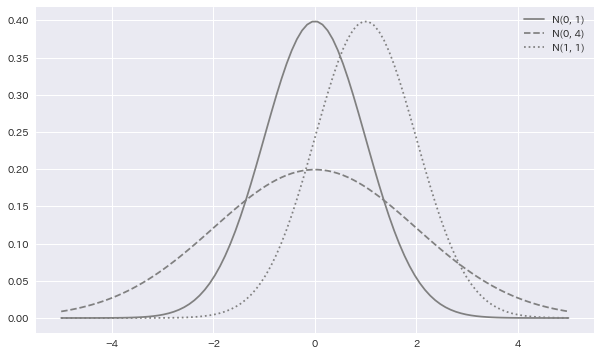

In [36]:
# 正規分布
# N(0, 1), N(0, 4), N(1, 1)を図示
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(
        xs, rv.pdf(xs),
        label=f'N({mu}, {sigma**2})', ls=ls, color='gray'
    )
ax.legend()

plt.show()

In [37]:
# 図8.5 さまざまな正規分布

@interact(mean=(-3, 3, 0.1), sigma=(0.1, 10.0, 0.1))
def N(mean=0, sigma=1):
    xs = np.linspace(-6, 6, 1000)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.norm(mean, sigma)
    ax.plot(xs, rv.pdf(xs))
    ax.set_xlim(-6, 6)
    ax.set_ylim(-0.02, 3)
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='mean', max=3.0, min=-3.0), FloatSlider(value=1.0, de…

#### 正規分布のまとめ

|||
|:--:|:--:|
|パラメータ|$\mu, \sigma$|
|とりうる値|実数全体|
|密度関数|$\dfrac{1}{\sqrt{2\pi}\sigma}exp\left\{ -\dfrac{(x - \mu)^2}{2\sigma^2} \right\}$|
|期待値|$\mu$|
|分散|$\sigma^2$|
|scipy.stats|norm($\mu, \sigma$)|

## 8.2 指数分布

- 指数分布（exponential distribution）
  - ある事象が発生する間隔が従う分布
  - 取りうる値（0以上）
  - $E_x(\lambda)$
  - パラメータ
    - λ

#### 指数分布の密度関数

$Ex(\lambda)$の密度関数

$$
f(x) = 
\begin{cases}
\begin{align*}
&\lambda e^{-\lambda x} ~~~ (x \geq 0)
\\
&0 ~~~~~~~~~ (otherwise)
\end{align*}
\end{cases}
$$

- $Ex(\lambda)$は、単位時間あたり平均$\lambda$回発生する事象の発生間隔が従う確率分布

#### 指数分布の期待値と分散

$X \sim Ex(\lambda)$とするとき、

$$
\begin{align*}
E(X) &= \dfrac{1}{\lambda}
\\
V(X) &= \dfrac{1}{\lambda^2}
\end{align*}
$$

In [38]:
def Ex(lam):
    """指数分布"""
    x_range = [0, np.inf]
    def f(x):
        """指数分布の密度関数"""
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0

    return x_range, f

In [39]:
# Ex(3)に従う確率変数Xの作成
lam = 3
X = Ex(lam)

In [40]:
# Ex(3)に従う確率変数Xの期待値と分散
# 期待値: 1/3、分散: 1/9
check_prob(X)

期待値: 0.333
分散: 0.111


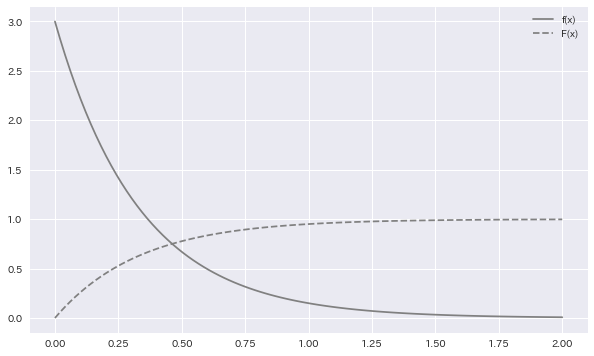

In [41]:
#  Ex(3)に従う確率変数Xの密度関数と分布関数を図示
# 区間: [0, 2]
plot_prob(X, 0, 2)

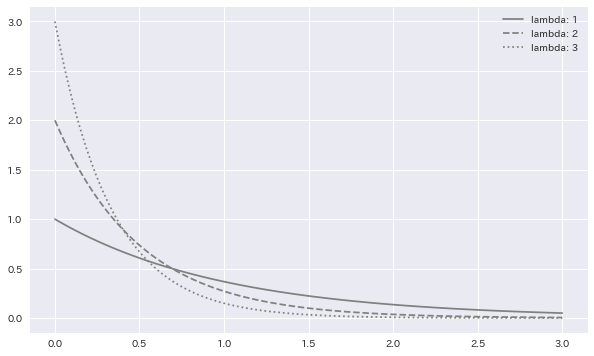

In [42]:
# scipy.statsで作成
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(
        xs, rv.pdf(xs),
        label=f"lambda: {lam}", ls=ls, color='gray'
    )
ax.legend()

plt.show()

In [43]:
# 図8.7 さまざまな指数分布

@interact(l=(0.1, 5, 0.1))
def Ex(l=0.1):
    xs = np.linspace(0, 2, 100)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.expon(scale=1/l)
    ax.plot(xs, rv.pdf(xs))
    ax.set_xlim(-0.02, 2)
    ax.set_ylim(-0.02, 5)
    plt.show()


interactive(children=(FloatSlider(value=0.1, description='l', max=5.0, min=0.1), Output()), _dom_classes=('wid…

#### 指数分布のまとめ

|||
|:--:|:--:|
|パラメータ|$\lambda$|
|とりうる値|正の実数|
|密度関数|$\lambda e^{-\lambda x}$|
|期待値|$1/\lambda$|
|分散|$1/\lambda^2$|
|scipy.stats|expon(scale=1/$\lambda$)|

## カイ二乗分布

- カイ二乗分布（chi-square distribution）
  - 分散の区間推定や独立性の検定で使われる確率分布
  - とりうる値（0以上の実数）

カイ二乗分布はお互いに独立な複数の標準正規分布によって、次のように定義される。

### カイ二乗分布 $\chi^2(n)$

$Z_1, Z_2, ..., Z_n$が互いに独立に$N(0, 1)$に従っているとき、その二乗和

$$
Y = \sum_{i=1}^{n} Z_{i}^2
$$

の確率分布を、「自由度nのカイ二乗分布」$\chi^2(n)$という。

- 標準正規分布でカイ二乗分布を作成
  - 標準正規分布からサンプルサイズ10で無作為抽出して、その二乗和をとる
  - 試行回数: 100万回
- これによって、$\sum_{i=1}^{10}Z_{i}^{2}$から抽出したサンプルサイズ100万の標本データを得ることができる

In [45]:
n = 10
rv = stats.norm()
sample_size = int(1e6)

# 標準正規分布から10*100万のサイズで無作為抽出
Zs_sample = rv.rvs((n, sample_size))

# axis=0 の方向で総和をとり、標準正規分布の二乗和の標本データを得る
chi2_sample = np.sum(Zs_sample**2, axis=0)

- 10個の標準正規分布の二乗和なので、自由度10のカイ二乗分布となっている
- scipy.stats.chi2()関数でカイ二乗分布に従う確率変数を作る
- 第1引数: 自由度

$\sum_{i=1}^{10}Z_i^2$から無作為抽出した標本データのヒストグラムと$\shi^2(10)$の密度関数を図示する

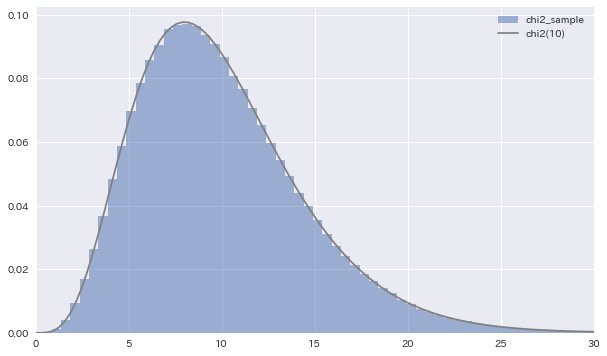

In [47]:
# 図8.8 カイ二乗分布と標準正規分布の関係
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)

ax.hist(
    chi2_sample, bins=100, density=True,
    alpha=0.5, label='chi2_sample'
)
ax.plot(
    xs, rv_true.pdf(xs),
    label=f"chi2({n})", color='gray'
)

ax.legend()
ax.set_xlim(0, 30)
plt.show()

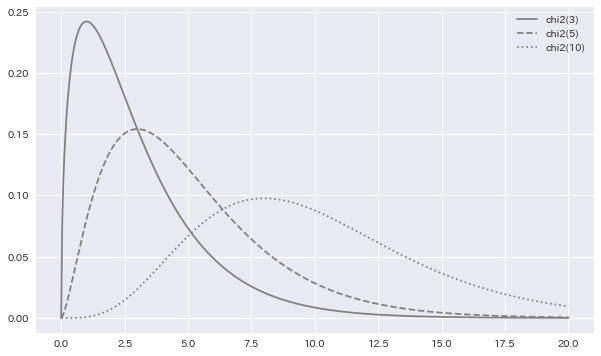

In [48]:
# カイ二乗分布 自由度nの図示
# 自由度n[3, 5, 10]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(
        xs, rv.pdf(xs),
        label=f"chi2({n})", ls=ls, color='gray'
    )

ax.legend()
plt.show()

In [49]:
# 図8.9 さまざまなカイ二乗分布

@interact(n=(1, 20, 1))
def chi2(n=1):
    xs = np.linspace(0, 20, 1000)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs))
    ax.set_xlim(-0.02, 20)
    ax.set_ylim(-0.02, 1)
    plt.show()


interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

#### カイ二乗分布の特徴

- 左右非対称で、右に歪んだ分布となっている
- 自由度が大きくなると、左右対称に近づく
- 自由度の値の近くに、分布のピークがある

- 自由度$n$のカイ二乗分布の上側$100_\alpha\%$点を、
- $\chi_\alpha^2(n)$と表記する

In [50]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070

#### カイ二乗分布のまとめ

|||
|:--:|:--:|
|パラメータ||
|とりうる値||
|scipy.stats|chi2($n$)|

## 8.4 t分布

- t分布（t distribution）
  - 正規分布の母平均の区間推定などに使われる確率分布
  - $t(n)$
  - とりうる値は、実数全体


互いに独立な標準正規分布とカイ二乗分布によって、次のように定義される。

### t分布

- 確率変数$Z, Y$は互いに独立で、
- $Z$は標準正規分布$N(0, 1)$に、
- $Y$は自由度$n$のカイ二乗分布$\chi^2(n)$に
- それぞれ従うとき、

$$
t = \dfrac{Z}{\sqrt{Y/n}}
$$

の確率分布を自由度$n$のt分布という。

標準正規分布とカイ二乗分布でt分布を作成

$Z \sim N(0, 1)$と$Y \sim \chi^2(10)$を使って、$\dfrac{Z}{sqrt{Y/10}}$から無作為抽出を行う。

In [51]:
n = 10
rv1 = stats.norm(0, 1)
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

$\dfrac{Z}{sqrt{Y/10}}$から無作為抽出した標本データを

ヒストグラムと$t(10)$の密度関数を図示する

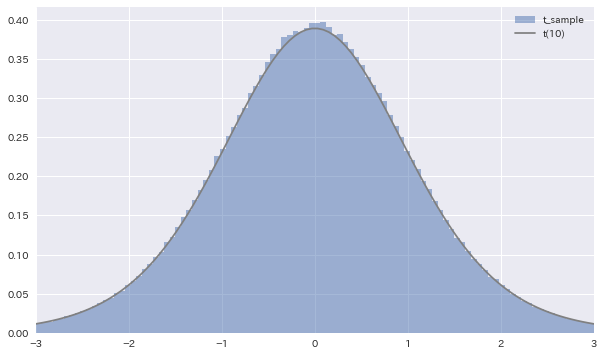

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3 , 3, 100)

ax.hist(
    t_sample, bins=100, range=(-3, 3),
    density=True, alpha=0.5, label='t_sample'
)
ax.plot(xs, rv.pdf(xs), label=f"t({n})", color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

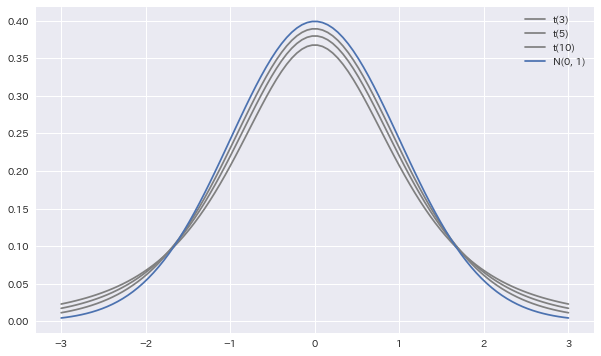

In [54]:
# 図8.11 さまざまなt分布
# 自由度n [3, 5, 10]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(
        xs, rv.pdf(xs),
        label=f"t({n})", color='gray'
    )
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')

ax.legend()
plt.show()

In [55]:
# 図8.11 さまざまなt分布

@interact(n=(1, 30, 1))
def t(n=1):
    xs = np.linspace(-3, 3, 100)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label='t')
    rv = stats.norm(loc=0, scale=1)
    ax.plot(xs, rv.pdf(xs), 'k', label='N(0, 1)')
    ax.set_ylim(-0.02, 0.5)
    ax.legend()
    plt.show()

interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

#### t分布の特徴

- 左右対称の分布になっている
- 標準正規分布よりも裾が厚い
- 自由度が大きくなると、標準正規分布に近づく
- 自由度$n$のt分布の上側$100_\alpha\%$点は、$t_\alpha(n)$と表記する

In [56]:
rv = stats.t(5)
rv.isf(0.05)

2.015

#### t分布のまとめ

|||
|:--:|:--:|
|パラメータ|$n$|
|とりうる値|実数全体|
|scipy.stats|t($n$)|